In [ ]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Conv1D
from keras import backend as k


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [ ]:
img_rows, img_cols=28, 28

if k.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  inpx = (1, img_rows, img_cols)

else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  inpx = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
import tensorflow as tf

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
inpx = Input(shape=inpx)
layer1 = Conv2D(32, kernel_size=(3,3), strides= (1,1) ,activation='relu')(inpx)
layer2=  BatchNormalization()(layer1)
layer3 = MaxPooling2D(pool_size=(2, 2),strides=(2,2))(layer2)

layer4 = Conv2D(32, (3, 3), strides=(1,1), padding= 'same', activation='relu')(layer3)
layer5 = BatchNormalization()(layer4)
layer6 = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(layer5)

layer7 = Flatten()(layer6)
layer8 = Dense(500, activation='relu')(layer7)
layer9 = Dense(10, activation='softmax')(layer8)


In [ ]:
no_epoch= 10

In [ ]:
model = Model([inpx], layer9)
model.compile(optimizer=tf.keras.optimizers.Adam(),
			loss=keras.losses.categorical_crossentropy,
			metrics=['accuracy'])

hist= model.fit(x_train, y_train, epochs=no_epoch, batch_size=64,validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 74s 87ms/step - loss: 0.1224 - accuracy: 0.9641 - val_loss: 0.0495 - val_accuracy: 0.9853
Epoch 2/10
844/844 [==============================] - 72s 86ms/step - loss: 0.0414 - accuracy: 0.9868 - val_loss: 0.0471 - val_accuracy: 0.9867
Epoch 3/10
844/844 [==============================] - 71s 84ms/step - loss: 0.0258 - accuracy: 0.9916 - val_loss: 0.0521 - val_accuracy: 0.9848
Epoch 4/10
844/844 [==============================] - 68s 81ms/step - loss: 0.0213 - accuracy: 0.9926 - val_loss: 0.0617 - val_accuracy: 0.9867
Epoch 5/10
844/844 [==============================] - 71s 84ms/step - loss: 0.0201 - accuracy: 0.9939 - val_loss: 0.0410 - val_accuracy: 0.9905
Epoch 6/10
844/844 [==============================] - 71s 84ms/step - loss: 0.0145 - accuracy: 0.9957 - val_loss: 0.0646 - val_accuracy: 0.9857
Epoch 7/10
844/844 [==============================] - 72s 86ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.0484 - val_accuracy:

In [ ]:
no= 2

In [ ]:
train_loss= hist.history['loss']
train_acc= hist.history['accuracy']


In [ ]:
val_loss=hist.history['val_loss']
val_acc=hist.history['val_accuracy']

In [ ]:
import matplotlib.pyplot as plt

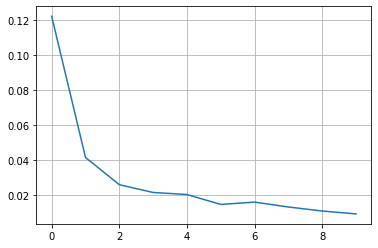

In [ ]:
plt.plot(train_loss)
plt.grid()

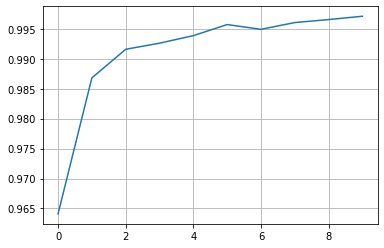

In [ ]:
plt.plot(train_acc)
plt.grid()

Text(0.5, 1.0, 'validation accuracy')

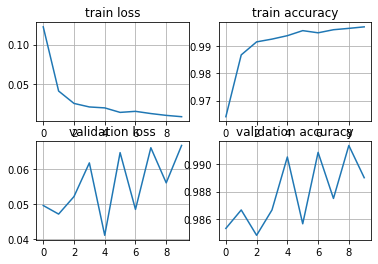

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.plot(train_loss)
plt.grid()
ax1.set_title('train loss')

ax2 = fig.add_subplot(2,2,2)
ax2.plot(train_acc)
plt.grid()
ax2.set_title('train accuracy')

ax3 = fig.add_subplot(2,2,3)
ax3.plot(val_loss)
plt.grid()
ax3.set_title('validation loss')

ax4 = fig.add_subplot(2,2,4)
ax4.plot(val_acc)
plt.grid()
ax4.set_title('validation accuracy')

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('loss=', score[0])
print('accuracy=', score[1])

313/313 [==============================] - 6s 18ms/step - loss: 0.0680 - accuracy: 0.9867
loss= 0.06802376359701157
accuracy= 0.9866999983787537


In [ ]:
model2 = Model([inpx], layer9)
model2.compile(optimizer=tf.keras.optimizers.Adam(),
			loss=keras.losses.categorical_crossentropy,
			metrics=['accuracy'])

hist= model2.fit(x_train, y_train, epochs=no_epoch, batch_size=15,validation_split=0.1)

Epoch 1/10
3600/3600 [==============================] - 104s 29ms/step - loss: 0.0440 - accuracy: 0.9911 - val_loss: 0.0788 - val_accuracy: 0.9882
Epoch 2/10
3600/3600 [==============================] - 106s 30ms/step - loss: 0.0299 - accuracy: 0.9929 - val_loss: 0.0795 - val_accuracy: 0.9885
Epoch 3/10
3600/3600 [==============================] - 106s 29ms/step - loss: 0.0243 - accuracy: 0.9941 - val_loss: 0.0792 - val_accuracy: 0.9883
Epoch 4/10
3600/3600 [==============================] - 103s 29ms/step - loss: 0.0194 - accuracy: 0.9953 - val_loss: 0.0799 - val_accuracy: 0.9877
Epoch 5/10
3600/3600 [==============================] - 103s 29ms/step - loss: 0.0182 - accuracy: 0.9958 - val_loss: 0.0903 - val_accuracy: 0.9872
Epoch 6/10
3600/3600 [==============================] - 107s 30ms/step - loss: 0.0165 - accuracy: 0.9960 - val_loss: 0.1023 - val_accuracy: 0.9863
Epoch 7/10
3600/3600 [==============================] - 103s 29ms/step - loss: 0.0133 - accuracy: 0.9967 - val_loss: 0

In [ ]:
train_loss= hist.history['loss']
train_acc= hist.history['accuracy']

In [ ]:
val_loss=hist.history['val_loss']
val_acc=hist.history['val_accuracy']

Text(0.5, 1.0, 'validation accuracy')

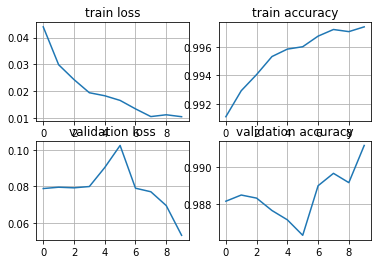

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.plot(train_loss)
plt.grid()
ax1.set_title('train loss')

ax2 = fig.add_subplot(2,2,2)
ax2.plot(train_acc)
plt.grid()
ax2.set_title('train accuracy')

ax3 = fig.add_subplot(2,2,3)
ax3.plot(val_loss)
plt.grid()
ax3.set_title('validation loss')

ax4 = fig.add_subplot(2,2,4)
ax4.plot(val_acc)
plt.grid()
ax4.set_title('validation accuracy')

In [ ]:
score = model2.evaluate(x_test, y_test, verbose=1)
print('loss=', score[0])
print('accuracy=', score[1])

313/313 [==============================] - 5s 15ms/step - loss: 0.0698 - accuracy: 0.9890
loss= 0.06982002407312393
accuracy= 0.9890000224113464


In [ ]:
model1 = Model([inpx], layer9)
model1.compile(optimizer=tf.keras.optimizers.Adam(),
			loss=keras.losses.categorical_crossentropy,
			metrics=['accuracy'])

hist= model1.fit(x_train, y_train, epochs=no_epoch, batch_size=128,validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 67s 157ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0520 - val_accuracy: 0.9923
Epoch 2/10
422/422 [==============================] - 65s 155ms/step - loss: 1.7122e-04 - accuracy: 1.0000 - val_loss: 0.0477 - val_accuracy: 0.9932
Epoch 3/10
422/422 [==============================] - 63s 150ms/step - loss: 1.8704e-05 - accuracy: 1.0000 - val_loss: 0.0491 - val_accuracy: 0.9935
Epoch 4/10
422/422 [==============================] - 63s 149ms/step - loss: 3.0498e-06 - accuracy: 1.0000 - val_loss: 0.0494 - val_accuracy: 0.9938
Epoch 5/10
422/422 [==============================] - 63s 150ms/step - loss: 2.2400e-06 - accuracy: 1.0000 - val_loss: 0.0499 - val_accuracy: 0.9938
Epoch 6/10
422/422 [==============================] - 65s 155ms/step - loss: 1.5770e-06 - accuracy: 1.0000 - val_loss: 0.0497 - val_accuracy: 0.9938
Epoch 7/10
422/422 [==============================] - 65s 155ms/step - loss: 1.2342e-06 - accuracy: 1.0000 - v

In [ ]:
score = model1.evaluate(x_test, y_test, verbose=1)
print('loss=', score[0])
print('accuracy=', score[1])

313/313 [==============================] - 4s 12ms/step - loss: 0.0535 - accuracy: 0.9932
loss= 0.05345218628644943
accuracy= 0.9932000041007996


In [ ]:
model1.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_2 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 batch_normalization_3 (Batc  (None, 13, 13, 32)       128

In [ ]:
layer= model1.layers

In [ ]:
layer

In [ ]:
filters,biases= model1.layers[1].get_weights()
print(layer[1].name, filters.shape)

conv2d_2 (3, 3, 1, 32)


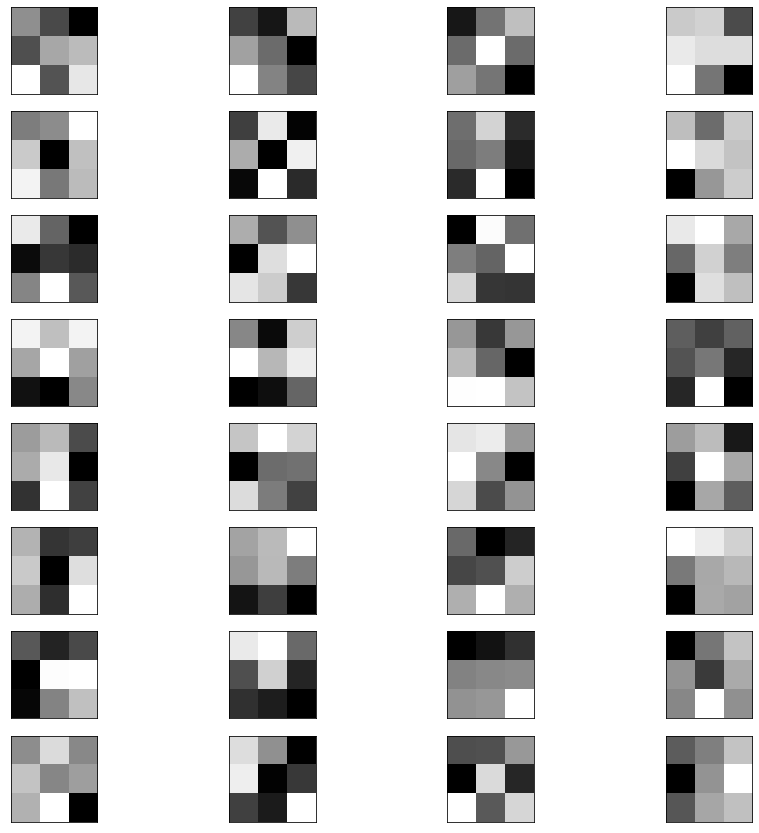

In [ ]:
fig1= plt.figure(figsize=(15,15))
columns= 4
rows= 8
n_filters= columns*rows
for i in range(1, n_filters+1):
  f= filters[:,:,:, i-1]
  fig1=plt.subplot(rows, columns, i)
  fig1.set_xticks([])
  fig1.set_yticks([])
  plt.imshow(f[:,:,0],cmap='gray')
plt.show()

conv2d_3 (3, 3, 32, 32)


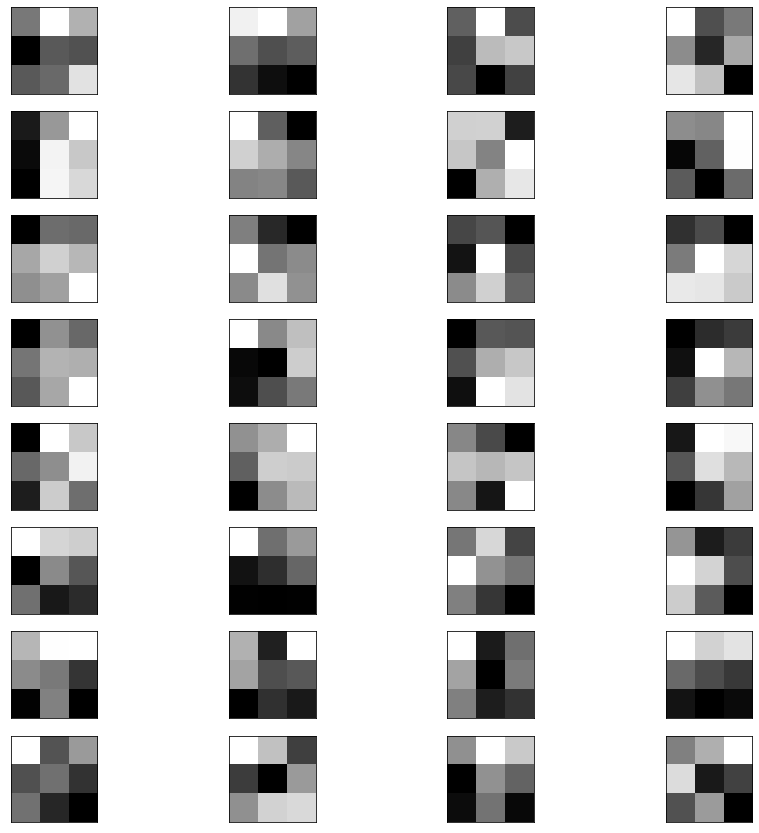

In [ ]:
filters,biases= model1.layers[4].get_weights()
print(layer[4].name, filters.shape)

fig1= plt.figure(figsize=(15,15))
columns= 4
rows= 8
n_filters= columns*rows
for i in range(1, n_filters+1):
  f= filters[:,:,:, i-1]
  fig1=plt.subplot(rows, columns, i)
  fig1.set_xticks([])
  fig1.set_yticks([])
  plt.imshow(f[:,:,0],cmap='gray')
plt.show()